<h1><center>Titanic Survivors</center></h1>

The following notebook is a simple solution to solve the Titanic survivor problem. Simply put we use data provided from the ill-fated Titanic voyage and attempt to predict who would survive and who would die.



## Data Dictionary

__Survival:__ (Did they survive?) 0 = No, 1 = Yes

__Pclass:__ (Ticket class) = 1st, 2 = 2nd, 3 = 3rd

__Sex:__ (Gender)

__Age:__ Age in years

__SibSp:__ Number of siblings / spouses aboard the Titanic

__Parch:__ Number of parents / children aboard the Titanic

__Ticket:__ The ticket number

__Fare:__ Passenger price fare

__Cabin:__ Cabin number

__Embarked:__ Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


## Solution Overview

Keras / Tensorflow will be used to create a simple neural network that can be trained to understand the data and perform predictions. This notebook will also be a line-by-line explanation of the code so that the code is easier to follow.

## Presumed Knowledge
There is some presumed knowledge of:
<ul>
    <li>Python 3+</li>
    <li>Neural Networks</li>
    <li>Keras / Tensorflow</li>
</ul>


<h1><center>Introduction and Data Analysis</center></h1>



In [18]:
#Importing usual suspects
import pandas as pd # LIbrary to help load and explore data
import numpy as np # Library for mathematical functions and support for arrays and matrices

#The following 2 lines are basically a config option to allow the cells in the notebook 
#to print all interactive input and not just the last one.
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

In [19]:
training_data = pd.read_csv("datasets/titanic/train.csv") # Load the training data into a dataframe
training_data.head(10) # show 10 line preview if brackets are falso just shows 5 as default

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
training_data.describe() # Show stats info about data - note only works for numerical value fields

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
training_data.info() #Information about the datatypes in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cleaning

Processing data through a neural network involves a fair bit of work to get the input in the right was so that the neural network can _understand_ it. This next section looks at the data and some ways of making the data more neural network friendly.

In [22]:
training_data.isnull().sum() #Show how man null values there are

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now lets look at each column individually and make some decisions as to whether or not we keep and fix the data or remove thius for the purposes of training our neural network. 

_Please note that this are decisions for this particular solution / notebook and other solutions may keep more or remove more data points/columns - which can also be a valid solution_
1. PassengerId: This column will be dropped from training data as it is not relevant to the output decision of survival probablity
2. Survived: This will be the column used as the output to train the neural network for
3. Pclass: The class of passenger would be a relevant data point so this will be kept.
4. Name: Name is probably not a relevant factor so this can be dropped from the training data 
5. Sex: Gender will be relevant to surcvalval so lets keep
6. Age: Age might be a relvant factor to determine survival possibility so this should be kept and fixed
7. SibSp: The count of siblings/spouses will be kept as it would be relevant to the survival probablity
8. Parch: The count of parents/children will be kept as it would be relevant to the survival probablity
9. Ticket: The ticket number is probably not relevant and should be ignored
10. Fare: The price of the ticket could be relevant to survival probablity and will be kept
11. Cabin: As there is no further information regarding the cabin besides the number then this not relevant and will be ignored.

**_Note that we need to do this to the test/unseen set too when we load that - we need to ensure that the this set resembles the training set_**



In [23]:
median_age_val = training_data["Age"].median() # show the median age
f"Median Age: {median_age_val}" 


'Median Age: 28.0'

In [24]:
mean_age_val = training_data["Age"].mean() # show the average age
f"Mean Age: {mean_age_val}" 

'Mean Age: 29.69911764705882'

Probably ok to pick either - lets go with mean.

Before this is done let's build a helper function that preprocesses (ie. cleans and engineers the features as needed). This is so we don't repeat the code over over again for the test set and any potential new tests we may want to do...

More on this later

In [25]:
#Function to clean the age column
def clean_age_column(age_col) -> pd.DataFrame:
    age_cleaned_df = age_col.fillna(training_data["Age"].mean()) # Habit to create intermediate variables - you could use inplace=True as part of the inplace method params but I like to have original and intermediate variables just in case
    # this is now the age column we will use later
    return age_cleaned_df
        

In [26]:
#Function to clean the embarked column

def clean_embarked_column(embarked_col) -> pd.DataFrame:
    #a simple way is to just take the most embarked port and fill the nulls. 
    embarked_cleaned =embarked_col.fillna(training_data["Embarked"].mode()[0])
    return embarked_cleaned

In [27]:
#As stated previously we will only work with the columns we need 
def filter_relevant_data(df) -> pd.DataFrame:
    clean_training_dataset = df.filter(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'])
    return clean_training_dataset

In [28]:
def perform_preprocessing(df) -> pd.DataFrame:
    cleaned_age_column = clean_age_column(df["Age"])
    cleaned_embarked_column = clean_embarked_column(df["Embarked"])
    cleaned_df = filter_relevant_data(df)
    cleaned_df["Age"] = cleaned_age_column
    cleaned_df["Embarked"] = cleaned_embarked_column
    return cleaned_df
        

In [55]:
clean_training_dataset = perform_preprocessing(training_data)
print("--- STEP 1 COMPLETE: Remove nulls and get relevant columns for training data ---")
print(clean_training_dataset.isna().sum())
    

--- STEP 1 COMPLETE: Remove nulls and get relevant columns for training data ---
Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Age         0
Embarked    0
dtype: int64


As we can see from the above we now have no more nulls so for the moment we can consider this data as _clean_ or probably more appropriately _complete_.

The next section we do some visulisations to get some intuition from our data.

## Visualising and Understanding

This next section we will use a matplolib and seaborn (graphing and plotting libraries) to visualise some data and get more intuition and understanding of the data.

Let's start with some simple single variable graphs

<AxesSubplot:ylabel='Survived'>

<AxesSubplot:ylabel='Pclass'>

<AxesSubplot:ylabel='Sex'>

<AxesSubplot:ylabel='SibSp'>

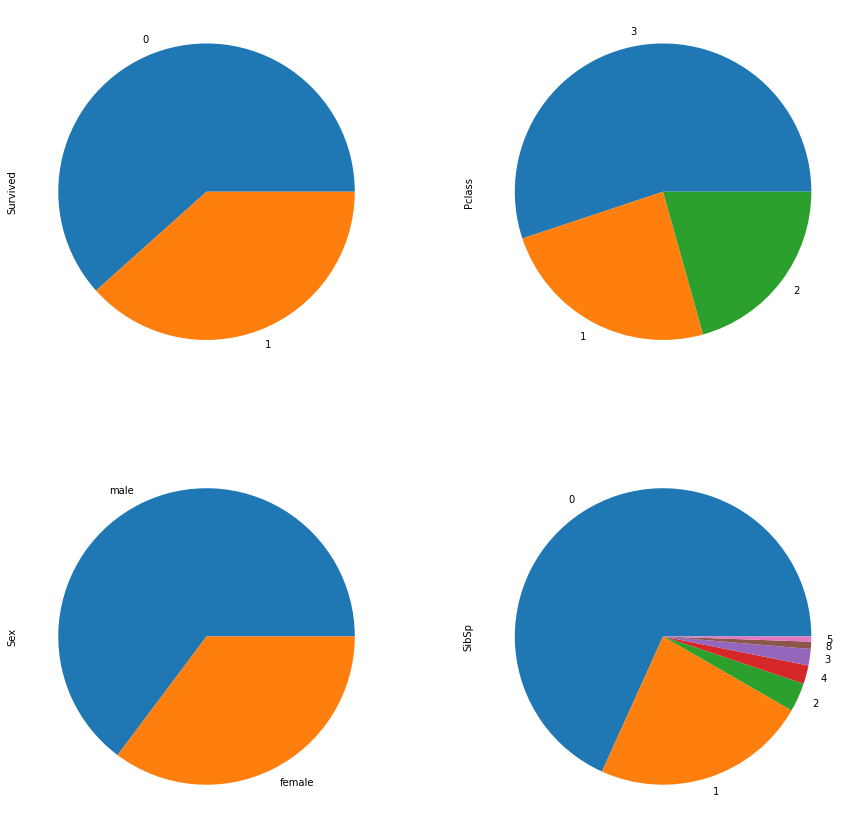

In [30]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(2, 2, figsize=(15,15)) #Create a figure of nrows and ncols and add the following plots to that figure


survived_df = clean_training_dataset["Survived"] # First graph takes the survived column
# We plot a pie chart of that column based on the counts and add it to the 0,0 position of the figure created before
survived_df.value_counts().plot(kind="pie", ax=ax1[0,0]) 


#The rest of the graphs follow suit.
class_df = clean_training_dataset["Pclass"]
class_df.value_counts().plot(kind="pie", ax=ax1[0,1])

gender_df = clean_training_dataset["Sex"]
gender_df.value_counts().plot(kind="pie", ax=ax1[1,0])


sibsp_df = clean_training_dataset["SibSp"]
sibsp_df.value_counts().plot(kind="pie", ax=ax1[1,1])



Graph 1 - Shows that not a lot survived (remember 0 = Did not survive)

Graph 2 - Shows that there were alot of people on 3rd class tickets

Graph 3 - Shows that there were a lot more men than women

Graph 4 - Shows that there were a lot of people without Siblings or Spouses (single possibly)

Now this is all well and good but lets do some deeper exploration with some examples of multiple variable graphs

<AxesSubplot:xlabel='Survived', ylabel='count'>

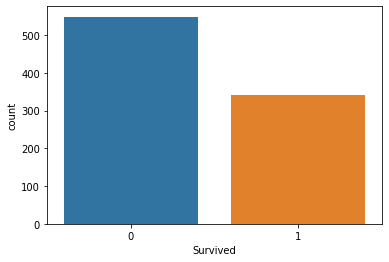

In [31]:
import seaborn as sns # Seaborn is built on matplotlib and gives some richer and more convenient features

sns.countplot(x="Survived", data=clean_training_dataset) #as an example we can see a bar chart for survived vs not


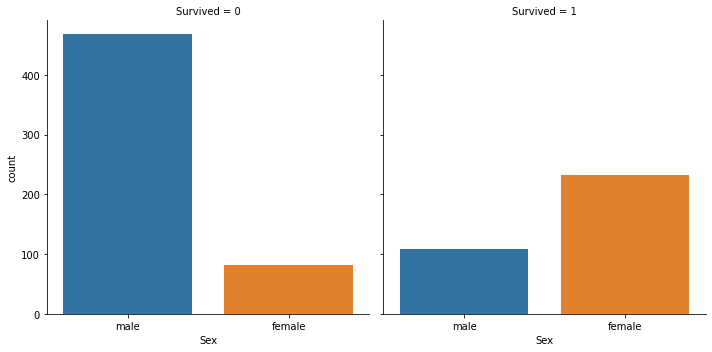

In [32]:
sns.catplot(x="Sex", col="Survived", kind="count", data=clean_training_dataset)

**Looks like more men did not survive than compared to women. Could be because, as the story goes, women and children were saved first.**

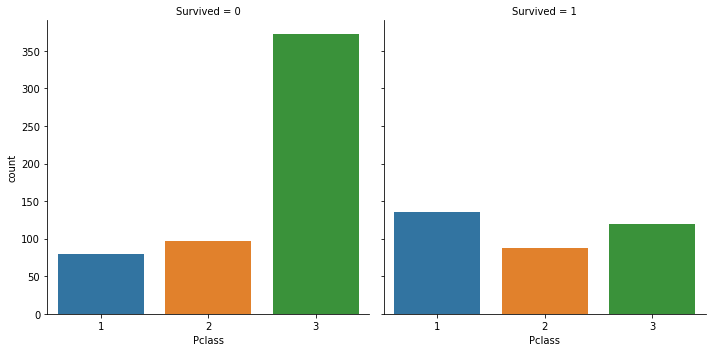

In [33]:
sns.catplot(x="Pclass", col="Survived", kind="count", data=clean_training_dataset)

**Seems reasonable to see those with worse living arrangements had a higher mortality rate. Intuitively shows that the upper class were probably better off**

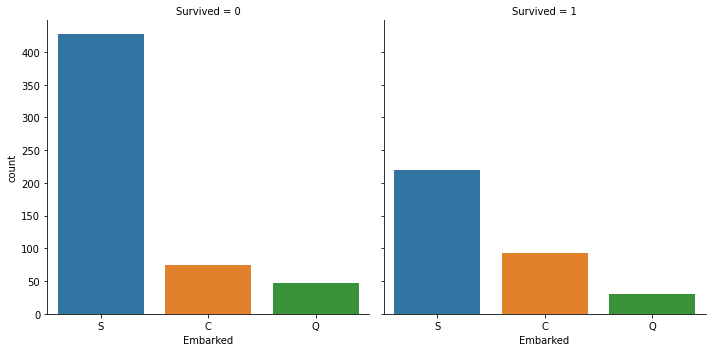

In [34]:
sns.catplot(x="Embarked", col="Survived", kind="count", data=clean_training_dataset)

**The above graph shows the mortality for the people who got on at different ports**

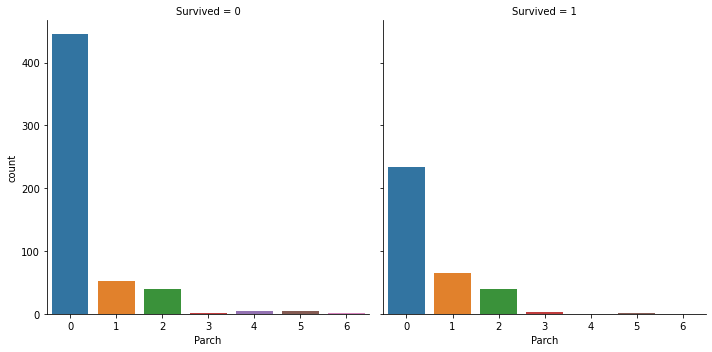

In [35]:
sns.catplot(x="Parch", col="Survived", kind="count", data=clean_training_dataset)

**The above graph is interesting and shows that proportinately, those with children or have parents seem to survive more than the ones with none. This again initutively supports the women and children first story.**

For brevity's sake not all the exploration and graphs have been included here and the above are just examples.For the next step we are going to be engineering the data to fit more in line with what a KERAS NN expects. 

<h1><center>Feature Engineering</center></h1>

This section creates categories where possible and engineers the features required for NN training to more NN friendly version.

## Family Size

As we saw earlier those with parents/children seem to have a better rate of surival. Lets extrapolate this with the size of the family. Lets add people with their parents and children aadn well as siblinsg and spuses and put them into the following categories:

<ul>
    <li>Singles</li>
    <li>Small families</li>
    <li>Standard families</li>
    <li>Large families</li>
</ul>



In [36]:
def create_family_size_bucket(family_size)->str:

    if family_size < 2:
        return "Single"
    if 2<=family_size <=3:
        return "Small Family"
    if 4 <= family_size <=6:
        return "Standard Family"
    if family_size > 6:
        return "Big Family"


def create_family_size_category(df)->pd.DataFrame:
    family_size_df = df["SibSp"] + df["Parch"] + 1 #Parents, children, siblings, spouses + 1 for themselves
    family_size_bucket = family_size_df.apply(lambda row: create_family_size_bucket(row)) #apply is more effecient way to perform an operation on each row of a dataset
    return family_size_bucket

clean_training_dataset["Family_Size"] = create_family_size_category(clean_training_dataset)
clean_training_dataset.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Family_Size
0,0,3,male,1,0,7.2500,22.0,S,Small Family
1,1,1,female,1,0,71.2833,38.0,C,Small Family
2,1,3,female,0,0,7.9250,26.0,S,Single
3,1,1,female,1,0,53.1000,35.0,S,Small Family
4,0,3,male,0,0,8.0500,35.0,S,Single


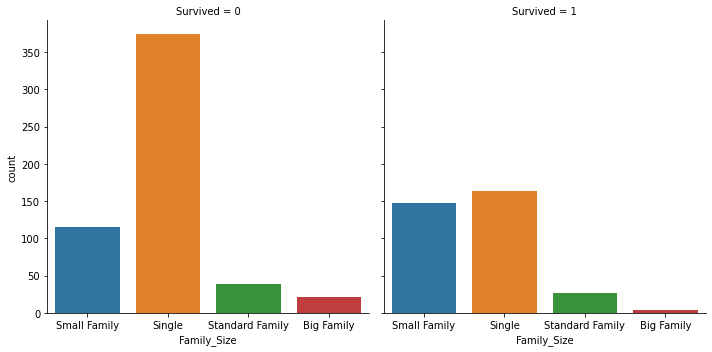

In [37]:
sns.catplot(x="Family_Size", col="Survived", kind="count", data=clean_training_dataset)

**Seems like the singles were worst off**

## Age Bracket

Lets put the this data point (which is a continuous variable and a little harder to handle) into a category of age brackets.

<ul>
    <li>Child</li>
    <li>Teen</li>
    <li>Young Adult</li>
    <li>Mature</li>
    <li>Senior</li>
    
</ul>



In [38]:
clean_training_dataset["Age"].max()
clean_training_dataset["Age"].min()
clean_training_dataset["Age"].mean()

80.0

0.42

29.69911764705882

In [39]:
def put_in_age_bucket(age):
    
    if 0.0 <= age <= 12.99:
        return "Child"
    if 13.0 <= age <= 19.99:
        return "Teen"
    if 20.0 <= age <= 39.99:
        return "Young Adult"
    if 40.0 <= age <= 59.99:
        return "Mature Age"
    if age >= 60:
        return "Senior"


def create_age_buckets(age_df):
    age_bucket_df = age_df.apply(lambda row: put_in_age_bucket(row))
    return age_bucket_df


clean_training_dataset["Age_Bucket"] = create_age_buckets(clean_training_dataset["Age"]) 
clean_training_dataset.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Family_Size,Age_Bucket
0,0,3,male,1,0,7.2500,22.0,S,Small Family,Young Adult
1,1,1,female,1,0,71.2833,38.0,C,Small Family,Young Adult
2,1,3,female,0,0,7.9250,26.0,S,Single,Young Adult
3,1,1,female,1,0,53.1000,35.0,S,Small Family,Young Adult
4,0,3,male,0,0,8.0500,35.0,S,Single,Young Adult


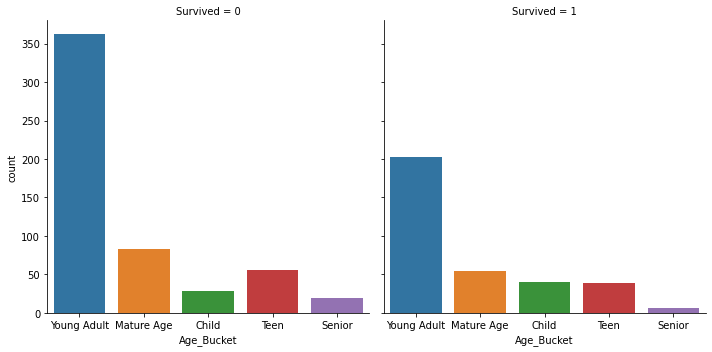

In [40]:
sns.catplot(x="Age_Bucket", col="Survived", kind="count", data=clean_training_dataset)

**Again the data visualisation shows that children, young people and the elderly had a beter probability of survival as they were probably saved first which seems intuitively correct**

## Fare Buckets

Now lets look at another continuous variable fare and see how much the price of admission is related to survival probablity. Again as a continuous variable lets make it easier and break into bucket. 

But let's first look at the fare data and see what we can learn

512.3292

0.0

32.204207968574636

14.4542

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Family_Size,Age_Bucket
0,0,3,male,1,0,7.2500,22.0,S,Small Family,Young Adult
1,1,1,female,1,0,71.2833,38.0,C,Small Family,Young Adult
2,1,3,female,0,0,7.9250,26.0,S,Single,Young Adult
3,1,1,female,1,0,53.1000,35.0,S,Small Family,Young Adult
4,0,3,male,0,0,8.0500,35.0,S,Single,Young Adult


<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='Fare', ylabel='Count'>

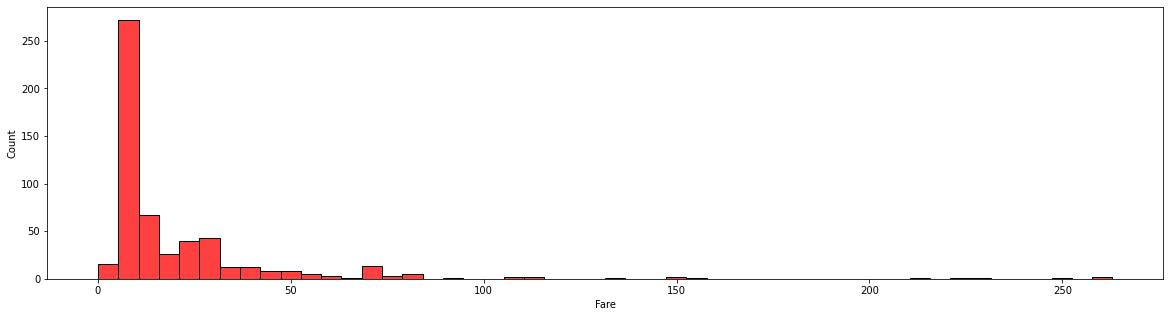

In [41]:
clean_training_dataset["Fare"].max()
clean_training_dataset["Fare"].min()
clean_training_dataset["Fare"].mean()
clean_training_dataset["Fare"].median()

clean_training_dataset.head()
plt.figure(figsize=(20,5))
sns.histplot(clean_training_dataset[clean_training_dataset.Survived == 0]["Fare"], 
             bins=50, color='r')


<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='Fare', ylabel='Count'>

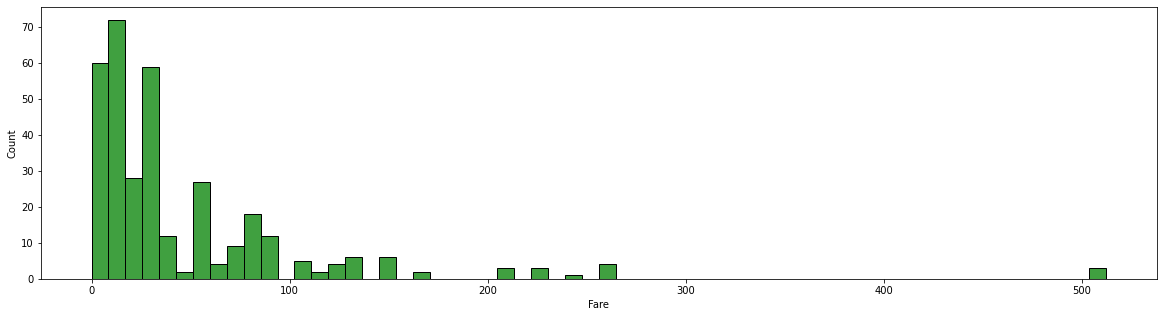

In [42]:
plt.figure(figsize=(20,5))
sns.histplot(clean_training_dataset[clean_training_dataset.Survived == 1]["Fare"], 
             bins=60, color='g')

**From the above data we can definitely see that those who paid more did better. A damning evidence of how the rich were probably looked after better**

Using the above data the thresholds in the code below seem reasonable to deliniate the following fare buckets:

<ul>
    <li>Low Fare</li>
    <li>Cheap Fare</li>
    <li>Standard Fare</li>
    <li>High Fare</li>
    <li>Highest Fare</li>
</ul>



In [43]:
def put_fare_into_bucket(fare):
    if 0.0 <= fare <= 10.0:
        return "Low Fare"
    if 10.0 < fare <= 20.0:
        return "Cheap Fare"
    if 20.0 < fare <= 50.0:
        return "Standard Fare"
    if 50.0 < fare <= 100.0:
        return "High Fare"
    if fare > 100:
        return "Highest Fare"

def create_fare_buckets(fare_df):
    fare_bucket_df = fare_df.apply(lambda row: put_fare_into_bucket(row))
    return fare_bucket_df


clean_training_dataset["Fare_Bucket"] = create_fare_buckets(clean_training_dataset["Fare"]) 


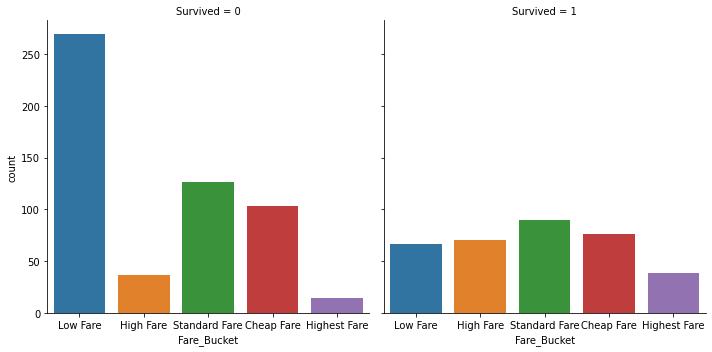

In [44]:
sns.catplot(x="Fare_Bucket", col="Survived", kind="count", data=clean_training_dataset)

**So again we see that the people with the lowest fare are the unluckiest ones proportionately**

In [45]:
del clean_training_dataset["Fare"]
del clean_training_dataset["Age"]
del clean_training_dataset["SibSp"]
del clean_training_dataset["Parch"]

clean_training_dataset.head()


,Survived,Pclass,Sex,Embarked,Family_Size,Age_Bucket,Fare_Bucket
0,0,3,male,S,Small Family,Young Adult,Low Fare
1,1,1,female,C,Small Family,Young Adult,High Fare
2,1,3,female,S,Single,Young Adult,Low Fare
3,1,1,female,S,Small Family,Young Adult,High Fare
4,0,3,male,S,Single,Young Adult,Low Fare


## Convert and Scale

So now we have the data we need and it looks prety good. Next step is to change the data into numerical form for the NN to understand it. 

To do this we have to represent everything as some numerical form and luckily we hanve Pandas to help with this.

__Pandas.getDummies()__ function takes all the categorical features as specified specify and breaks them into category values. 

Eg. the Sex colmn will be converted to 2 columns where a male is represented by Sex_male= 1 and Sex_female=0 and the Pclass column will be broken into 3 columns

We can see this when we run the next cell.

In [46]:
train_X = pd.get_dummies(clean_training_dataset, columns=["Pclass", "Sex", "Embarked", "Family_Size", "Age_Bucket", "Fare_Bucket"],
                                    prefix_sep=["_","_","_","_","_","_"], drop_first=True)



train_X.head()


,Survived,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Size_Single,Family_Size_Small Family,Family_Size_Standard Family,Age_Bucket_Mature Age,Age_Bucket_Senior,Age_Bucket_Teen,Age_Bucket_Young Adult,Fare_Bucket_High Fare,Fare_Bucket_Highest Fare,Fare_Bucket_Low Fare,Fare_Bucket_Standard Fare
0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
4,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0


Almost makes sense. 

However there seems to be one column missing from each data point mentioned and the reason for this is the _drop_first=True_ attribute that we added to the getDummies function.

This attribute when set to true drops the first of each clumn that has been categorised and split and this is done so that redundant columns / data is removed.

For example, taking the case of the Sex column, we don't have to specify Sex_male=1 **and** Sex_female=0 for a male. We can simply say that Sex_male=1 implies male and Sex_male=0 implies female. This follows true for all the other category fields as well.

This reduces the data data that is needed to be fed into the network making it more effecient. 

Now create the the y value or the output value we need to train the data for:

In [47]:

train_y = clean_training_dataset["Survived"]#Survived is what we need

del train_X["Survived"]#This can now be removed from the training data.
train_y.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Now let's normalise all the training data for the neural network. 

Normalizing the data generally speeds up learning and leads to faster convergence.

In [68]:
from sklearn.preprocessing import StandardScaler # 

#Create a numpy array from the training dataset
X = train_X.values
y = train_y.values
sc = StandardScaler()

X = sc.fit_transform(X)

## Unseen Data

We now need to load the unseen data or more specifically the data we are going to check our model with.



Now we load he data we want to predict (unseen data). After this we i should be checked / ensured that all preprocessing and data cleaning stages are performed.

This done exactly the same as the training data.

In [51]:
#Load the unseen data
unseen_data_df = pd.read_csv("datasets/titanic/test.csv")
unseen_data_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
unseen_data_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
clean_unseen_df = perform_preprocessing(unseen_data_df)


clean_unseen_df["Age_Bucket"] = create_age_buckets(clean_unseen_df["Age"]) 
clean_unseen_df["Fare_Bucket"] = create_fare_buckets(clean_unseen_df["Fare"])
clean_unseen_df["Family_Size"] = create_family_size_category(clean_unseen_df)

clean_unseen_df.head()
#unseen_data_fare_cleaned = unseen_data_df["Fare"].fillna(unseen_data_df["Fare"].median())
#unseen_data_age_cleaned = unseen_data_df["Age"].fillna(unseen_data_df["Age"].mean())

,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Age_Bucket,Fare_Bucket,Family_Size
0,3,male,0,0,7.8292,34.5,Q,Young Adult,Low Fare,Single
1,3,female,1,0,7.0000,47.0,S,Mature Age,Low Fare,Small Family
2,2,male,0,0,9.6875,62.0,Q,Senior,Low Fare,Single
3,3,male,0,0,8.6625,27.0,S,Young Adult,Low Fare,Single
4,3,female,1,1,12.2875,22.0,S,Young Adult,Cheap Fare,Small Family


In [140]:
del clean_unseen_df["Fare"]
del clean_unseen_df["Age"]
del clean_unseen_df["SibSp"]
del clean_unseen_df["Parch"]

test_X = pd.get_dummies(clean_unseen_df, columns=["Pclass", "Sex", "Family_Size", "Embarked","Age_Bucket", "Fare_Bucket"],
                                    prefix_sep=["_","_","_","_","_","_"], drop_first=True)



test_X.head()


KeyError: 'Fare'

In [58]:
testX = test_X.values
testX = testX.astype(np.float64, copy=False)

In [61]:
testX = sc.fit_transform(testX)

X.shape
testX.shape

(891, 16)

(418, 16)

So now everything looks good and the unseen data is in the same shape and format as the training data. The next step is to create the model.

<h1><center>Neural Network Development</center></h1>

## Overview

We now need to develop an _artificial neural network_ which can learn with the training data and predict with a the probablity of survival with a reasonable degree of accuracy.

Without getting into the nitty gritty of neral networks we need to create:

<ul>
    <li>The Input layer - This will be the layer that takes the input </li>
    <li>Output Layer - The final layer that gives us the prbablity of survival </li>
    <li>Hidden Layers - An arbitrary number of layers which have nodes and wieights that can be altered/trained</li>
</ul>

These will be combined together to create a neural network

We also need to make choices for:

<ul>
    <li>Activation Function</li>
    <li>Loss Function</li>
    <li>Optimizer</li>

</ul>



In [64]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

In [65]:
# Debug checking
print("Tensorflow version: " + tf.__version__)
print("Keras version: "  + keras.__version__)

Tensorflow version: 2.2.0
Keras version: 2.4.3


Whilst a full theory on Keras and Tensorflow is out of scope here, the following section/code is commented to give as much detail as possible.

The architecture chosen was that of:

<ul>
    <li>2 Hidden Layers</li>
    <li>RELU activation function</li>
    <li>2 Dropout layers</li>
    <li>2 Hidden Layers</li>
    <li>Output layer with Sigmoid activation</li>
    <li>Stochastic Gradient Descent for Optimizer</li>
    <li>Loss Function - Binary Crossentropy</li>
</ul>

This is just one example of an architecure that worked for us. There are many ways to develop different NN architectures (and/or different hyperparameters that can be tuned).


## Model Creation

Now we implement the architecture.

In [66]:
predictive_model = Sequential() # a sequential neural network

input_layer = Input(shape=(X.shape[1],)) #the input layer must match the shape of the input

hidden_layer_1 = Dense(32, activation="relu", kernel_initializer="uniform") # hidden layer with 32 nodes, relu activation and uniform initialized weights
dropout_1 = Dropout(0.5) #droput layer - drop half the nodes - prevents overfitting

hidden_layer_2 = Dense(64, activation="relu", kernel_initializer="uniform") 
dropout_2 = Dropout(0.5)

output_layer = Dense(1, kernel_initializer="uniform", activation="sigmoid") #the output layer is a one node layer that gives a probablity

#put them all together
predictive_model.add(input_layer)
predictive_model.add(hidden_layer_1)
predictive_model.add(dropout_1)

predictive_model.add(hidden_layer_2)
predictive_model.add(dropout_2)

predictive_model.add(output_layer)

predictive_model.summary() #print what it looks like

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________


## Training

The following section shows the training of the simple neural network developed using:

**100 Epochs**: An epoch is basicaly when all data has passed therough the network (forward and backward propagation) once

and 

**Batch Size of 50**: The training data is broken up into batches of 50 

**Binary Cross Entropy** loss function: As this is a binary classification problem (0 death or 1 for survival) this is a valid choice. 

In [69]:
callback = EarlyStopping(monitor="accuracy", patience=10) # Stop training early if accuracy does not really change after 10 epochs

sgd = SGD(lr=0.1, momentum=0.8)
predictive_model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["accuracy"])

#Start training - this may take a minute based on uyour hardware
history = predictive_model.fit(X, y, validation_split=0.2, batch_size=50, epochs=100, 
                               verbose=2, callbacks=[callback])

Epoch 1/100
15/15 - 0s - loss: 0.6795 - accuracy: 0.5983 - val_loss: 0.6548 - val_accuracy: 0.6425
Epoch 2/100
15/15 - 0s - loss: 0.6680 - accuracy: 0.6096 - val_loss: 0.6509 - val_accuracy: 0.6425
Epoch 3/100
15/15 - 0s - loss: 0.6651 - accuracy: 0.6096 - val_loss: 0.6427 - val_accuracy: 0.6425
Epoch 4/100
15/15 - 0s - loss: 0.6554 - accuracy: 0.6067 - val_loss: 0.6183 - val_accuracy: 0.6425
Epoch 5/100
15/15 - 0s - loss: 0.6113 - accuracy: 0.6475 - val_loss: 0.5229 - val_accuracy: 0.7989
Epoch 6/100
15/15 - 0s - loss: 0.5246 - accuracy: 0.7556 - val_loss: 0.4419 - val_accuracy: 0.8045
Epoch 7/100
15/15 - 0s - loss: 0.5034 - accuracy: 0.7711 - val_loss: 0.4340 - val_accuracy: 0.7989
Epoch 8/100
15/15 - 0s - loss: 0.4902 - accuracy: 0.7865 - val_loss: 0.4207 - val_accuracy: 0.8101
Epoch 9/100
15/15 - 0s - loss: 0.4598 - accuracy: 0.7992 - val_loss: 0.4033 - val_accuracy: 0.8268
Epoch 10/100
15/15 - 0s - loss: 0.4747 - accuracy: 0.7907 - val_loss: 0.4063 - val_accuracy: 0.8101
Epoch 11/

In [70]:
if len(history.history["accuracy"]) < 100:
    print("Stopped early after " + str(len(history.history['accuracy'])) + " epochs")

print(history.history.keys())

Stopped early after 31 epochs
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 1.0, 'Model Accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

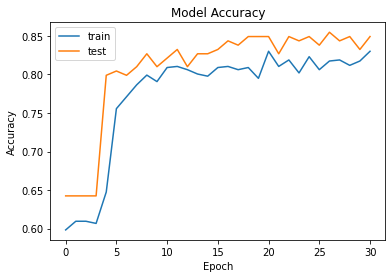

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')


## Create Sumbmission (Optional)

In [81]:
#optional
predictions = predictive_model.predict(testX)
submissions = np.rint(predictions)

submission_list = []
for s in submissions:
    submission_list.append(int(s[0]))

out = pd.DataFrame({"PassengerId": unseen_data_df.PassengerId, "Survived":submission_list})

out.head(20)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [82]:
out.to_csv("submission.csv")

In [110]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
intuition_df = pd.DataFrame()
row = {"Pclass": 3, 
       "Name": "Tes Pas", 
       "Sex":"female", 
       "Age":15, 
       "SibSp":0, 
       "Parch":0, 
       "Ticket":78, 
       "Fare": 8.0292, 
       "Cabin": "S", 
       "Embarked": "Q"}
intuition_df = intuition_df.append(row, ignore_index=True)
intuition_df.head()
print(X[22])

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
0,15.0,S,Q,8.0292,Tes Pas,0.0,3.0,female,0.0,78.0


[-0.51015154  0.90258736 -1.35557354  3.25137334 -1.62380254  0.81192233
 -0.64713971 -0.28284271 -0.42626003 -0.17337186  2.89464115 -1.31330524
 -0.36943144 -0.25148722  1.28521816 -0.56568542]


In [137]:
print(i1["Age"])

0    15.0
Name: Age, dtype: float64


In [139]:


#del i1["Fare"]
#del i1["Age"]
#del i1["SibSp"]
#del i1["Parch"]

i1.info()



#iX.head()
#iX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SibSp                 1 non-null      float64
 1   Parch                 1 non-null      float64
 2   Fare                  1 non-null      float64
 3   Age                   1 non-null      float64
 4   Pclass_3.0            1 non-null      uint8  
 5   Sex_female            1 non-null      uint8  
 6   Family_Size_Single    1 non-null      uint8  
 7   Embarked_Q            1 non-null      uint8  
 8   Age_Bucket_Teen       1 non-null      uint8  
 9   Fare_Bucket_Low Fare  1 non-null      uint8  
dtypes: float64(4), uint8(6)
memory usage: 166.0 bytes
